In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("TensorFlow_FILES/DATA/fake_reg.csv")

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


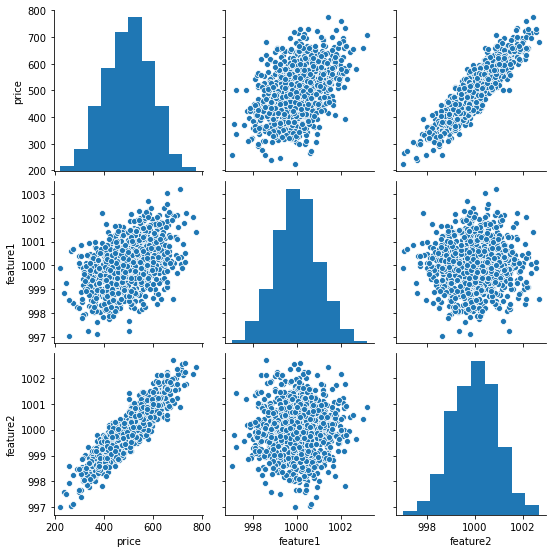

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['feature1', 'feature2']].values
y = df[['price']].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
X_train.shape

(700, 2)

#### Data Scaling 

* Scaling of Data is required for neural network

In [12]:
#You have to normalize and scale feature data
from sklearn.preprocessing import MinMaxScaler

In [13]:
scalar = MinMaxScaler()

In [14]:
scalar.fit(X_train)

MinMaxScaler()

In [15]:
X_train = scalar.transform(X_train)

In [16]:
X_test = scalar.transform(X_test)

#### Model creation and training

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [22]:
model.fit(x= X_train, y = y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 3ms/step - loss: 256754.1875
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256636.2969
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256556.2031
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256472.9219
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256378.9062
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 256268.0156
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256138.9062
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255989.8281
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255821.0000
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255631.1719
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 255420.0156
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [25]:
loss_df = pd.DataFrame(model.history.history)

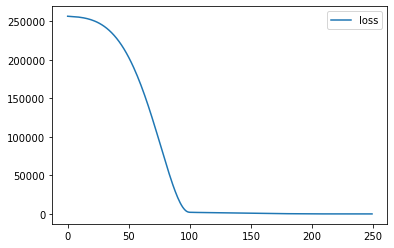

In [26]:
loss_df.plot()

#### Model Evaluation 

In [40]:
model.evaluate(X_test, y_test, verbose=0)

25.062183380126953

In [41]:
test_prediction = model.predict(X_test)

In [42]:
test_prediction = pd.Series(test_prediction.reshape(300,))

In [43]:
test_prediction

0      405.574341
1      623.555664
2      592.139404
3      572.412781
4      367.154297
          ...    
295    529.269043
296    515.816162
297    609.661499
298    417.128693
299    411.232269
Length: 300, dtype: float32

In [44]:
pred_df = pd.DataFrame(y_test, columns = ['True y value'])

In [46]:
pred_df = pd.concat([pred_df, test_prediction], axis = 'columns')

In [48]:
pred_df.columns = ['Test_true_y', 'model_pred_y']

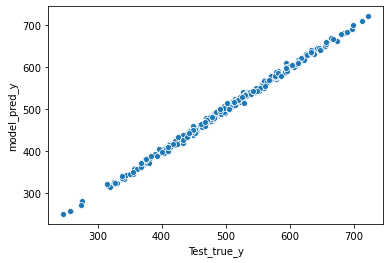

In [51]:
sns.scatterplot(x = 'Test_true_y', y = 'model_pred_y', data= pred_df)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
mean_absolute_error(y_test, test_prediction)

4.019844381907869

In [54]:
mean_squared_error(y_test, test_prediction)

25.062188085800607

In [55]:
np.sqrt(mean_squared_error(y_test, test_prediction))

5.0062149460246514

#### Prediction on new data

In [56]:
new_gem = [[998, 1000]]

In [58]:
new_gem = scalar.transform(new_gem)

In [59]:
model.predict(new_gem)

array([[420.1445]], dtype=float32)

#### Saving and loading a model through keras

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model.save('./my_gem_model.h5')

In [63]:
later_model = load_model('my_gem_model.h5')

In [64]:
later_model.predict(new_gem)

array([[420.1445]], dtype=float32)

## Part 2

#### Regression problem

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('./TensorFlow_FILES/DATA/kc_house_data.csv')

In [78]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [79]:
df.shape

(21597, 21)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [81]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [82]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


#### Exploratory data analysis (EDA)

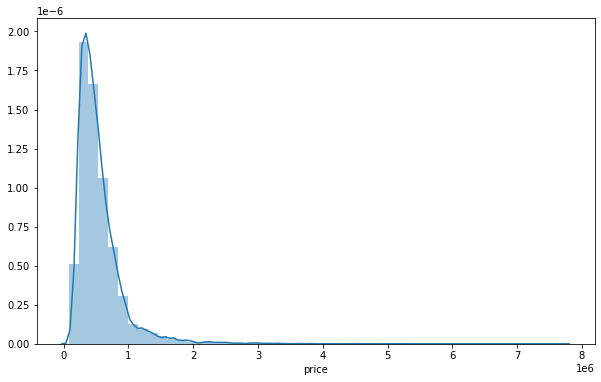

In [84]:
plt.figure(figsize = (10, 6))
sns.distplot(df['price'])

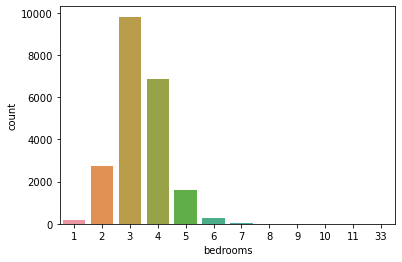

In [85]:
sns.countplot(df['bedrooms'])

In [89]:
#find what correlates with your label the most (both positive and negative correlation)
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

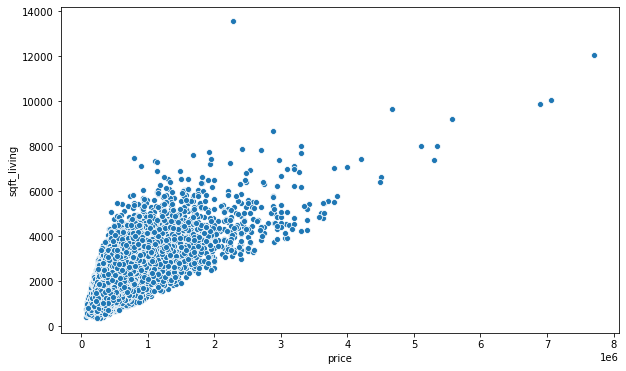

In [91]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'price', y = 'sqft_living', data = df)

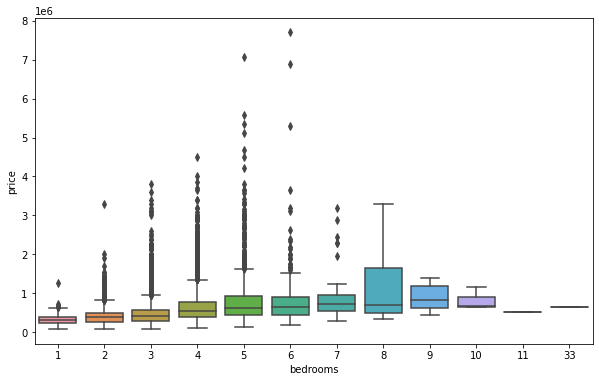

In [92]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'bedrooms', y = 'price', data = df)

In [96]:
df.loc[:, ['lat', 'long', 'price']].head()

,lat,long,price
0,47.5112,-122.257,221900.0
1,47.7210,-122.319,538000.0
2,47.7379,-122.233,180000.0
3,47.5208,-122.393,604000.0
4,47.6168,-122.045,510000.0


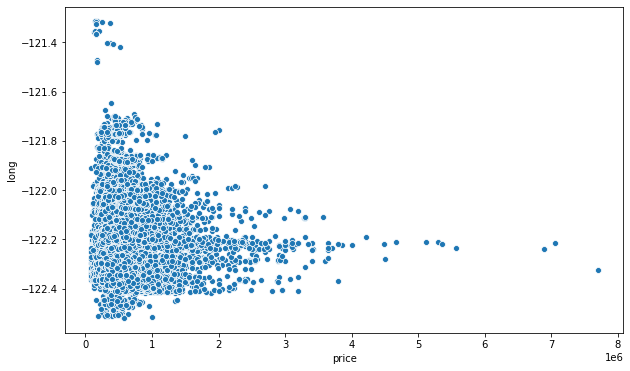

In [97]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'price', y = 'long', data = df)

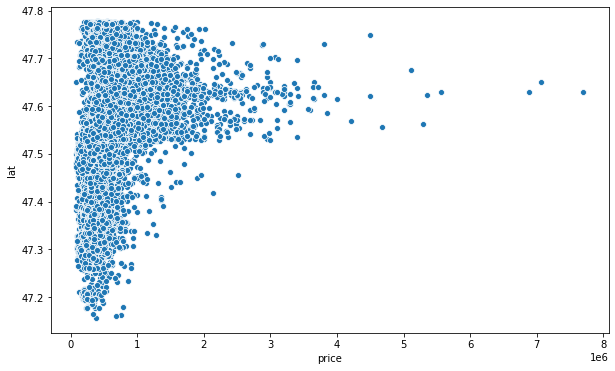

In [98]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'price', y = 'lat', data = df)

In [99]:
# Certain combinations of latitude and longitude may affect price

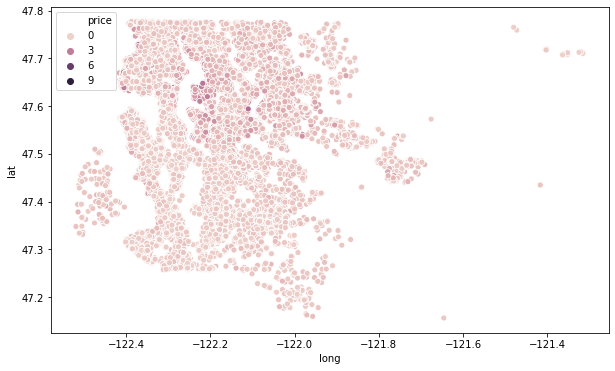

In [101]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price')

#### Dealing with outliers 

In [103]:
df.sort_values('price', ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [105]:
len(df)*0.01

215.97

In [106]:
#grabbing only the top 1 percent of housing 
non_top_1_perc = df.sort_values('price', ascending = False).iloc[216: , : ]

In [110]:
non_top_1_perc.shape

(21381, 21)

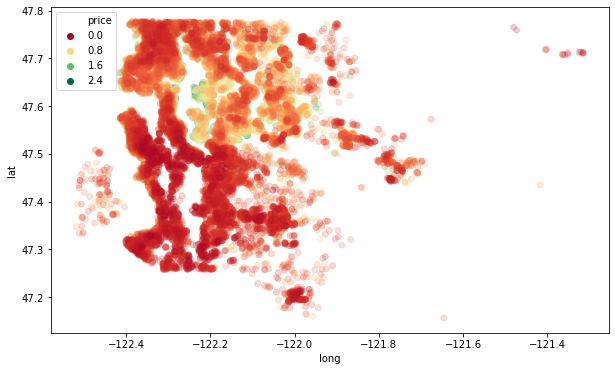

In [114]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'long', y = 'lat', data = non_top_1_perc, hue = 'price', edgecolor = None, alpha = 0.2, palette = 'RdYlGn')

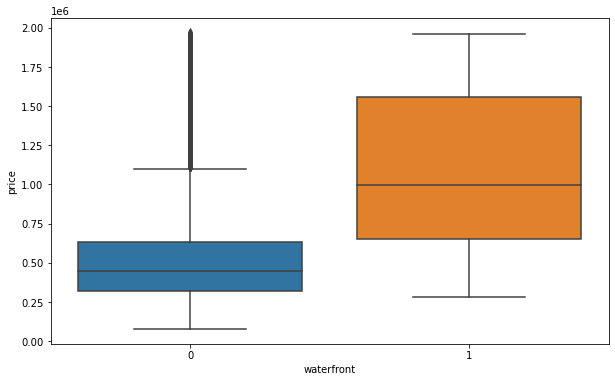

In [116]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'waterfront', y = 'price', data = non_top_1_perc)

In [117]:
#Houses on the waterfront are more expensive

In [118]:
df = df.drop('id', axis = 'columns')

In [119]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [120]:
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [121]:
df['date'] = pd.to_datetime(df['date'])

In [123]:
df['date'].dtype.name

'datetime64[ns]'

In [124]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [125]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [126]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


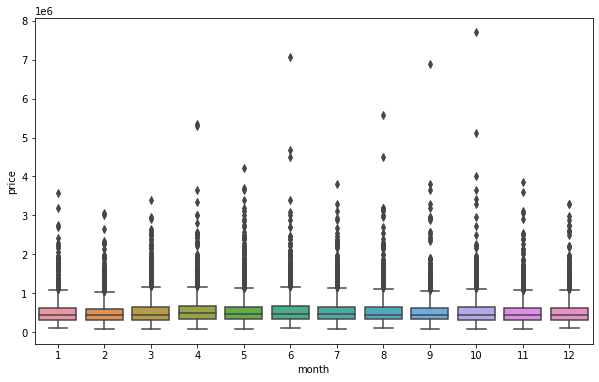

In [127]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'month', y = 'price', data = df)

In [128]:
#Hard to tell from the top

In [132]:
df.groupby('month').mean()['price'].sort_values(ascending = False)

month
4     562215.615074
6     557534.318182
5     550849.746893
7     544892.161013
3     544057.683200
10    539439.447228
8     536655.212481
9     529723.517787
1     525963.251534
12    524799.902041
11    522359.903478
2     508520.051323
Name: price, dtype: float64

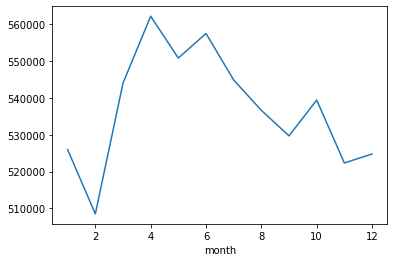

In [133]:
df.groupby('month').mean()['price'].plot()

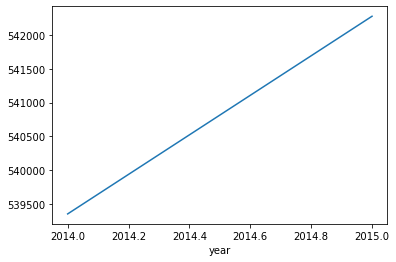

In [135]:
#plot based on the year
df.groupby('year').mean()['price'].plot()

In [136]:
df = df.drop('date', axis = 'columns')

In [137]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [138]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [141]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [142]:
#Creating a dummy variable will be too much here

In [143]:
df = df.drop('zipcode', axis = 'columns')

In [145]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [146]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

#### Data Preprocessing 

In [148]:
X = df.drop('price', axis = 'columns').values
y = df['price'].values

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

##### Note: Do feature scaling post split to only fit to the train set and prevent data leakage from test set

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
scaler = MinMaxScaler()

In [155]:
X_train = scaler.fit_transform(X_train)

In [157]:
X_train[:5, :]

array([[0.3       , 0.08      , 0.19855222, 0.00350125, 0.2       ,
        0.        , 1.        , 0.75      , 0.4       , 0.23701731,
        0.02904564, 0.1826087 , 0.        , 0.70098118, 0.19019934,
        0.34262605, 0.00657863, 0.        , 0.72727273],
       [0.2       , 0.28      , 0.1302999 , 0.00121151, 0.4       ,
        0.        , 0.        , 0.5       , 0.4       , 0.1677763 ,
        0.        , 0.91304348, 0.        , 0.63278108, 0.43272425,
        0.21183961, 0.00288289, 0.        , 0.45454545],
       [0.3       , 0.48      , 0.25646329, 0.00306329, 0.4       ,
        0.        , 0.        , 0.5       , 0.5       , 0.21038615,
        0.18672199, 0.99130435, 0.        , 0.59401641, 0.27159468,
        0.42178627, 0.00588823, 1.        , 0.36363636],
       [0.2       , 0.2       , 0.12099276, 0.00370236, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.09320905,
        0.09751037, 0.51304348, 0.        , 0.54913946, 0.2217608 ,
        0.363

In [158]:
X_test = scaler.transform(X_test)

In [159]:
X_test[:5, :]

array([[0.1       , 0.08      , 0.04239917, 0.00469519, 0.        ,
        0.        , 0.        , 0.75      , 0.3       , 0.05459387,
        0.        , 0.20869565, 0.        , 0.87518096, 0.18189369,
        0.31337119, 0.00887725, 0.        , 0.63636364],
       [0.3       , 0.36      , 0.17269907, 0.00513436, 0.        ,
        0.        , 0.        , 0.75      , 0.5       , 0.11850866,
        0.16182573, 0.64347826, 0.        , 0.8204922 , 0.27740864,
        0.35639305, 0.00993734, 0.        , 0.81818182],
       [0.2       , 0.24      , 0.12512927, 0.00211408, 0.        ,
        0.        , 0.        , 0.75      , 0.4       , 0.05592543,
        0.16390041, 0.07826087, 0.        , 0.83802477, 0.12292359,
        0.16365514, 0.00547073, 0.        , 0.90909091],
       [0.1       , 0.08      , 0.05791107, 0.00354971, 0.        ,
        0.        , 0.        , 0.75      , 0.4       , 0.07456724,
        0.        , 0.34782609, 0.        , 0.86150877, 0.16445183,
        0.134

#### Model creation

In [161]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [162]:
X_train.shape 

(15117, 19)

In [ ]:
# Based on this number of features, we can decide on the number of layers to have 

In [166]:
model = Sequential()

In [167]:
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

#final layer
model.add(Dense(1))
model.compile(optimizer ='adam', loss = 'mse')

In [168]:
#We will pass our test data as the validation data for Deep neural net to track and prevents overfitting
#The test data won't affect the weight or biases of our network 
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 430239219712.0000 - val_loss: 418911813632.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429060390912.0000 - val_loss: 414728093696.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 411662188544.0000 - val_loss: 374351101952.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 325222989824.0000 - val_loss: 236942737408.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 166542868480.0000 - val_loss: 105889488896.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 100330053632.0000 - val_loss: 93948329984.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 96050511872.0000 - val_loss: 91944812544.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 93832036352.0000 - val_loss: 89780805632.0000
Epoch 9/400
119/119 [

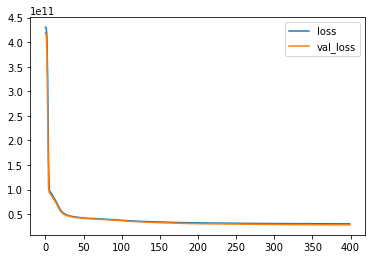

In [171]:
losses = pd.DataFrame(model.history.history)
losses.plot()

##### The graph is ideally what we want to see in order to avoid overfitting of the model to the training data.  

In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [173]:
prediction = model.predict(X_test)

In [174]:
mean_absolute_error(y_test, prediction)

102388.7957730517

In [175]:
mean_squared_error(y_test, prediction)

28104998947.217236

In [177]:
np.sqrt(mean_squared_error(y_test, prediction))

167645.45608878648

In [178]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [179]:
explained_variance_score(y_test, prediction)

0.7883162150165378

##### Explained variance score of 1 means really good predictions. 

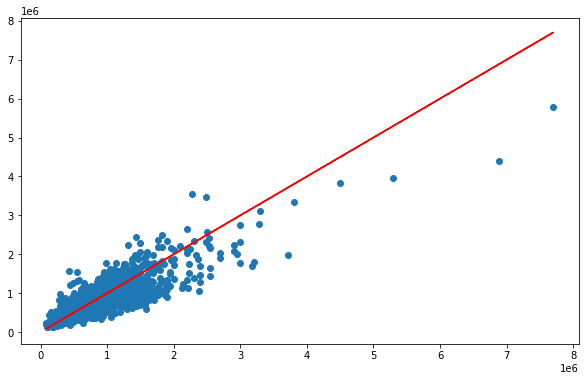

In [181]:
plt.figure(figsize = (10, 6))
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test, 'r')

##### The red line represents the perfect prediction line. We got punished here to the large outliers where our model didnt do well at predicting them. 

In [188]:
#Prediction of the first price in the dataframe

new_house = df.drop('price', axis = 1).iloc[0, :]

In [189]:
new_house.values.reshape(-1, 19) #-1 means keep those old dimensions along that axis. 

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [190]:
new_house = scaler.transform(new_house.values.reshape(-1, 19))

In [191]:
model.predict(new_house)

array([[276062.4]], dtype=float32)

In [192]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
